In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

In [5]:
data_set = pd.read_csv('insurance.csv')

In [6]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Problem Statement


In [7]:
def load_insurance_data():
    data = pd.read_csv("insurance.csv")
    X = data.iloc[:, :-1]  # Select all columns except the last one (features)
    y = data.iloc[:, -1]   # Select the last column (target variable)
    return X, y

In [8]:
X_train,y_train = load_insurance_data()
X_features =X_train.columns.tolist()

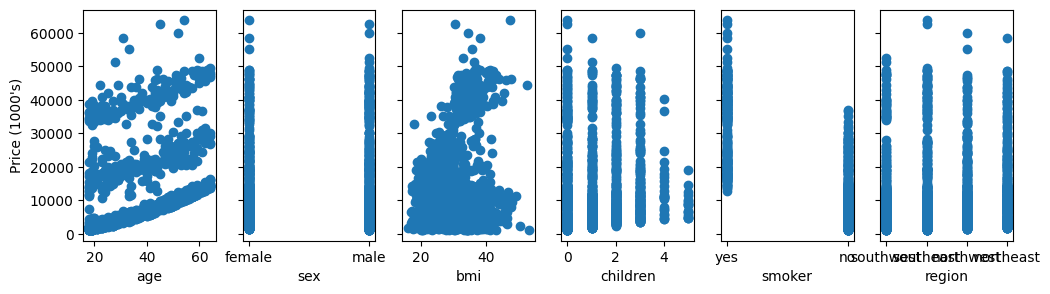

In [9]:
fig,ax=plt.subplots(1, X_train.shape[1], figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train.iloc[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [10]:
data_set['smoker'] = data_set['smoker'].astype('category').cat.codes

In [11]:
data_set.to_csv("insurance_preprocessed.csv", index=False) # how i save the data set into a new .csv

In [12]:
print(data_set['smoker'].dtype)

int8


In [13]:
print(data_set.describe()) #how i can see a sumary of my datas

               age          bmi     children       smoker       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918     0.204783  13270.422265
std      14.049960     6.098187     1.205493     0.403694  12110.011237
min      18.000000    15.960000     0.000000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000     0.000000   9382.033000
75%      51.000000    34.693750     2.000000     0.000000  16639.912515
max      64.000000    53.130000     5.000000     1.000000  63770.428010


In [14]:
x_data = data_set['age']
y_data = data_set['charges']

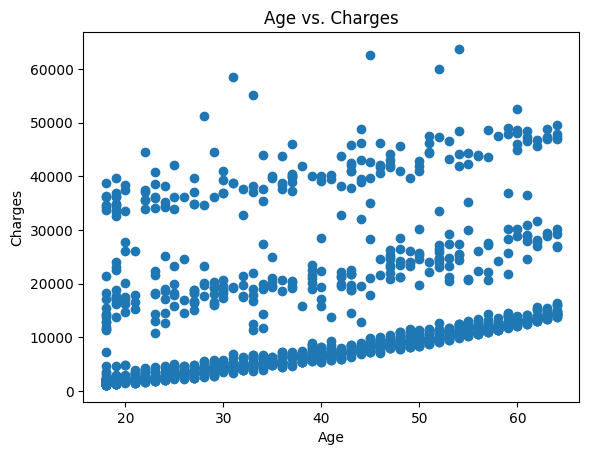

In [15]:
plt.scatter(x_data, y_data)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()


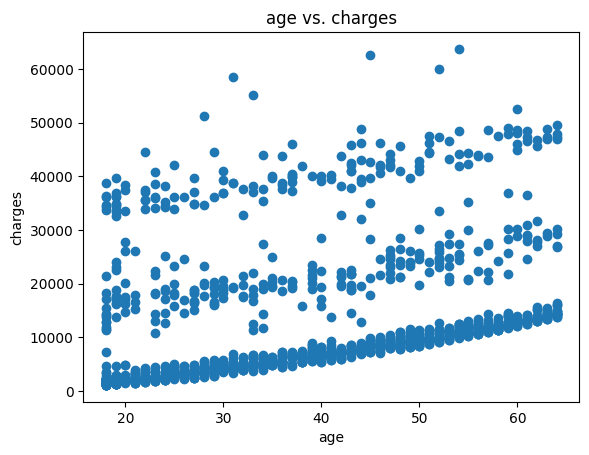

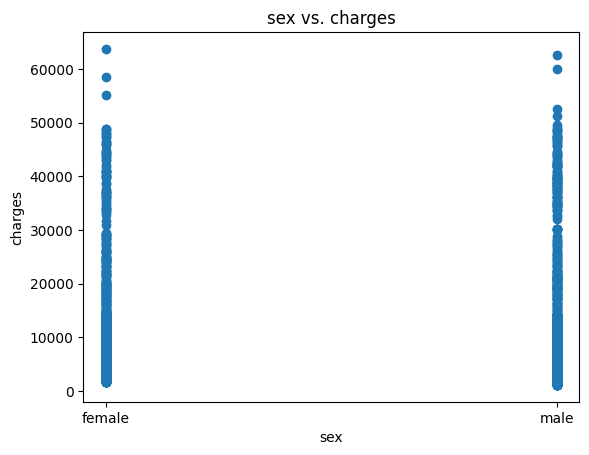

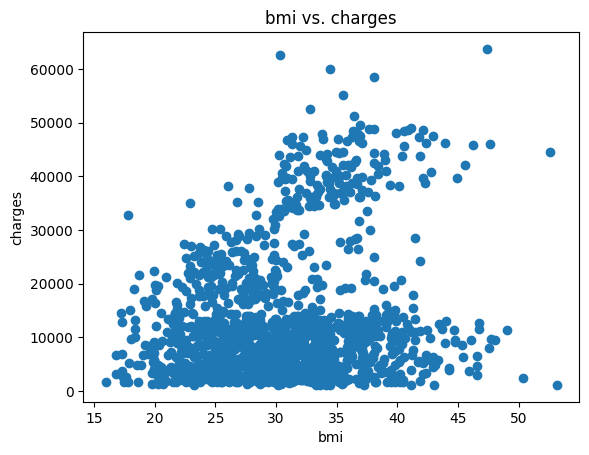

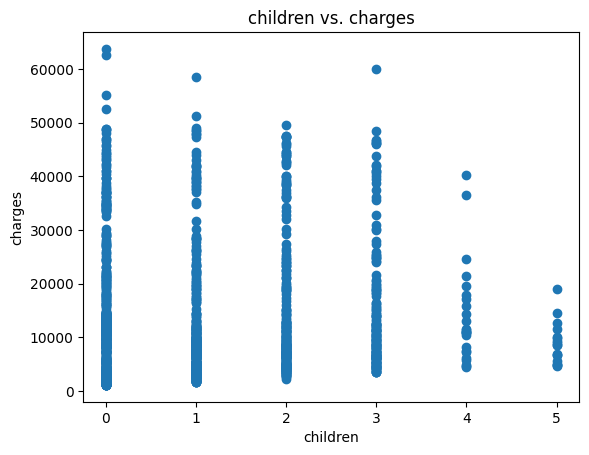

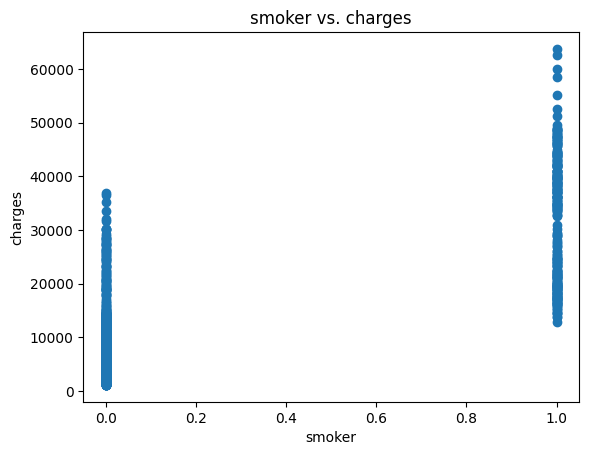

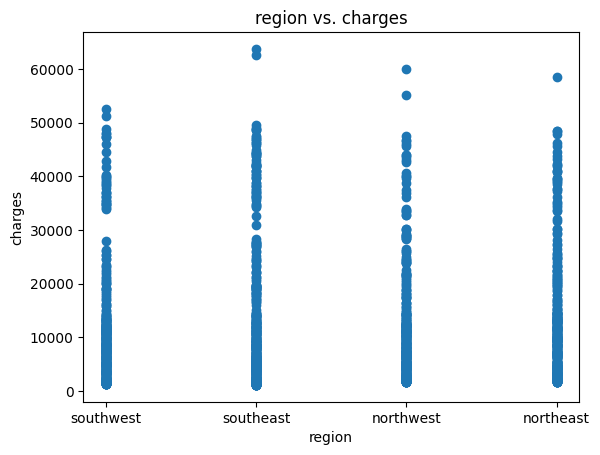

In [16]:
output_column = 'charges'

for i in data_set.columns:
    if i != output_column:
        plt.scatter(data_set[i], data_set[output_column])
        plt.xlabel(i)
        plt.ylabel(output_column)
        plt.title(f'{i} vs. {output_column}')
        plt.show()


In [17]:
def train_validation(x, y, validation_size = 0.2, random_state = None):
    x_validation = x.sample(frac = validation_size, random_state = random_state)
    y_validation = y[x_validation.index]

    x_train = x.drop(x_validation.index)
    y_train = y.drop(y_validation.index)

    return np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation)

In [18]:
from sklearn.model_selection import train_test_split

# i have to define X and Y(this is the output)
X = data_set.drop(columns=['charges'])  # caracteristichs= anything different from 'charges'
y = data_set['charges']  #output =charges column,this is the only one who changes

# this is how i split the data https://ioflood.com/blog/train-test-split-sklearn/
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiunile setului de antrenare (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiunile setului de validare (X_val, y_val):", X_val.shape, y_val.shape)


Dimensiunile setului de antrenare (X_train, y_train): (1070, 6) (1070,)
Dimensiunile setului de validare (X_val, y_val): (268, 6) (268,)


Ponderile finale: [0.78727137 0.90230727]


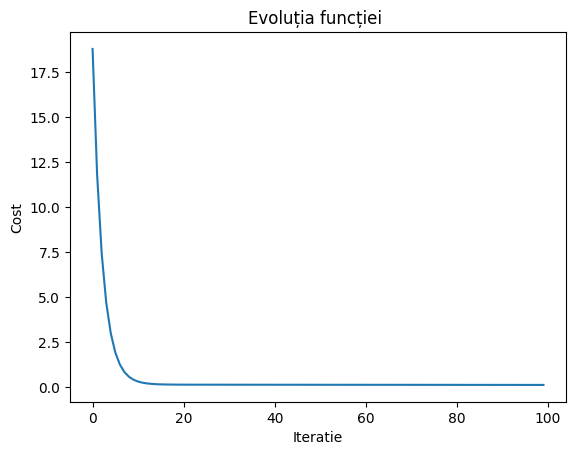

In [19]:
#cost functions
def cost_function(X, y, weights):
    predictions = np.dot(X, weights)
    sq_diff = (predictions - y) ** 2
    return np.mean(sq_diff)

# gradient_descent ?
def gradient_descent(X, y, initial_weights, learning_rate, num_iterations):
    weights = initial_weights
    cost_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / len(X)
        weights -= learning_rate * gradient

        # cost
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# traning datas
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([2, 4, 6, 8])

# traning parameters
initial_weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
num_iterations = 100

# Apelarea algoritmului Gradient Descent
final_weights, cost_history = gradient_descent(X_train, y_train, initial_weights, learning_rate, num_iterations)

# final ponders
print("Ponderile finale:", final_weights)

# graphic
plt.plot(cost_history)
plt.xlabel('Iteratie')
plt.ylabel('Cost')
plt.title('Evoluția funcției ')
plt.show()

In [20]:
def compute_cost(X, y, w, b): 
   
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2      
    cost = cost / (2 * m)                      
    return cost

### Gradient descent MLR

In [21]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost


In [22]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [23]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

NameError: name 'w_init' is not defined

In [24]:
# Define initial weights and bias
w_init = np.zeros(X_train.shape[1])
b_init = 0.0

# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 15.0


In [25]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [26]:
import copy

import math

# initialize parameters
initial_w = np.zeros(len(X_train[0]))
initial_b = 0.
# some gradient descent settings
iterations = 10
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")


Iteration    0: Cost    15.00   
Iteration    1: Cost    15.00   
Iteration    2: Cost    15.00   
Iteration    3: Cost    15.00   
Iteration    4: Cost    15.00   
Iteration    5: Cost    15.00   
Iteration    6: Cost    15.00   
Iteration    7: Cost    15.00   
Iteration    8: Cost    15.00   
Iteration    9: Cost    15.00   
b,w found by gradient descent: 0.00,[7.49963439e-05 9.99950783e-05] 
prediction: 0.00, target value: 2
prediction: 0.00, target value: 4
prediction: 0.00, target value: 6
prediction: 0.00, target value: 8


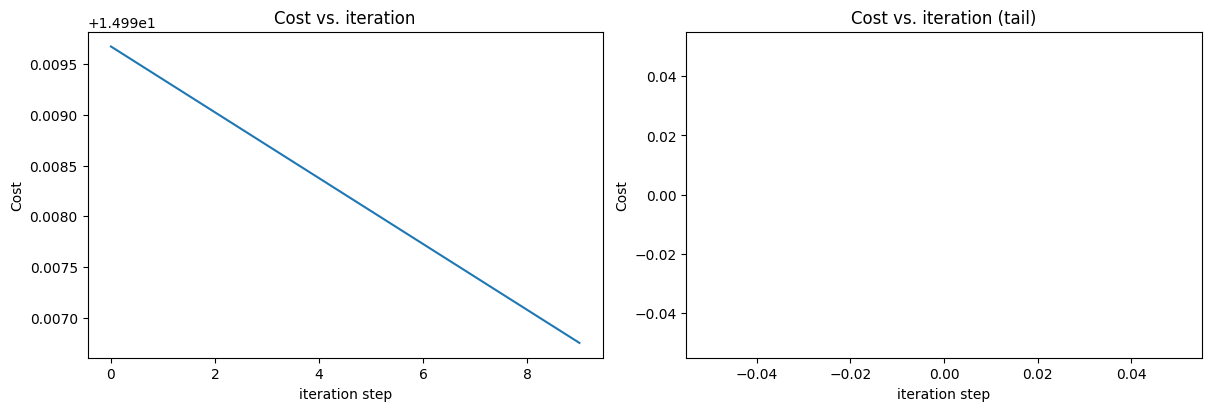

In [27]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()


### R Squared


In [28]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

data_set = pd.read_csv('insurance.csv')

# data preprocessing
data_set_encoded = pd.get_dummies(data_set, drop_first=True)

# data split
X = data_set_encoded.drop('charges', axis=1)  
y = data_set_encoded['charges']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the ExtraTreesRegressor
fraction = 0.0001
reg = ensemble.ExtraTreesRegressor(
    n_estimators=20, 
    min_samples_split=fraction * 2, 
    min_samples_leaf=fraction
)
_ = reg.fit(X_train, y_train)

# r-squared data sets on training
r2_train = reg.score(X_train, y_train)
print(f"R-squared score on the training dataset: {r2_train}")

# on validation
r2_val = reg.score(X_val, y_val)
print(f"R-squared score on the validation dataset: {r2_val}")


R-squared score on the training dataset: 0.9983078124756305
R-squared score on the validation dataset: 0.8389898033802989


In [29]:
#R-squared score on the training dataset: 0.9983078124756305
#R-squared score on the validation dataset: 0.8451777679399204 training thest is higher than validation set i think i have problems with datapoints that
#are not seen by the program



In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

w_final = model.coef_

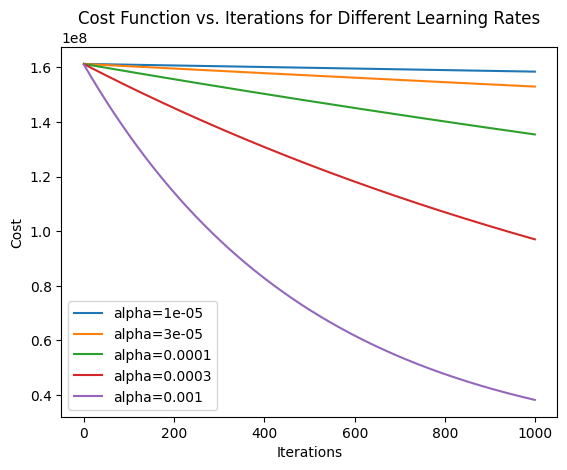

R-squared score on the training dataset: 0.9983078124756305
R-squared score on the validation dataset: 0.8355493118298857


In [32]:
data_set = pd.read_csv('insurance.csv')

data_set_encoded = pd.get_dummies(data_set, drop_first=True)

# data split
X = data_set_encoded.drop('charges', axis=1)
y = data_set_encoded['charges']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features using Z-score normalization
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_val_normalized = (X_val - X_train.mean()) / X_train.std() 


def compute_cost(X, y, w, b):
    m = len(y)
    cost = np.sum((np.dot(X, w) + b - y) ** 2) / (2 * m)
    return cost


def gradient_descent(X, y, w, b, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        y_pred = np.dot(X, w) + b
        error = y_pred - y
        
       
        w = w - (alpha * (1 / m) * np.dot(X.T, error))
        b = b - (alpha * (1 / m) * np.sum(error))
        
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
    
    return w, b, J_history


learning_rates = [1e-5, 3e-5, 1e-4, 3e-4, 1e-3]
num_iters = 1000

for alpha in learning_rates:
   
    initial_w = np.zeros(X_train_normalized.shape[1])
    initial_b = 0.
    
   
    w_final, b_final, J_hist = gradient_descent(X_train_normalized, y_train, initial_w, initial_b, alpha, num_iters)
    

    plt.plot(range(num_iters), J_hist, label=f'alpha={alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations for Different Learning Rates')
plt.legend()
plt.show()


best_alpha = 3e-4


reg = ensemble.ExtraTreesRegressor(
    n_estimators=20, 
    min_samples_split=fraction * 2, 
    min_samples_leaf=fraction
)
_ = reg.fit(X_train_normalized, y_train)


r2_train = reg.score(X_train_normalized, y_train)
print(f"R-squared score on the training dataset: {r2_train}")

# Calculate R-squared scores on the validation dataset
y_val_predicted = reg.predict(X_val_normalized)
r2_val = r2_score(y_val, y_val_predicted)
print(f"R-squared score on the validation dataset: {r2_val}")

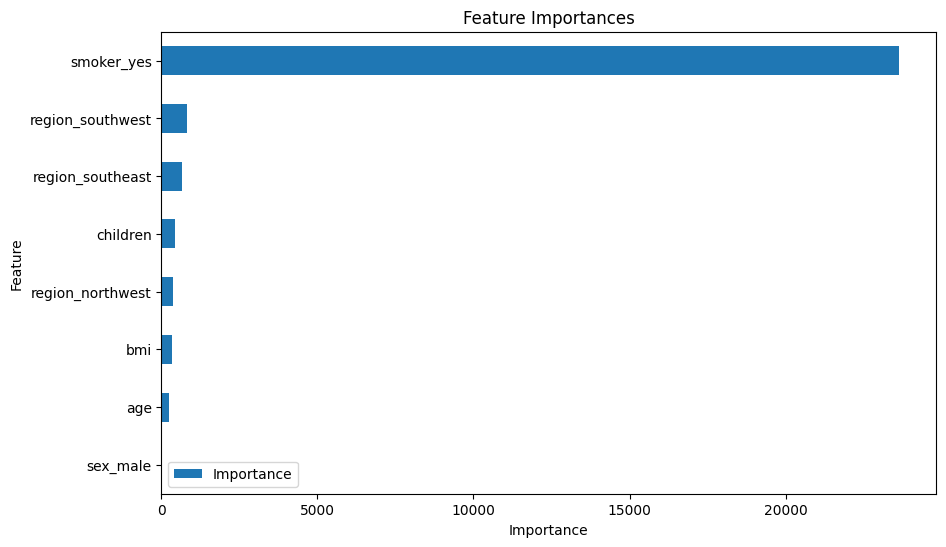

In [35]:
import copy
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': X_train.columns.values, 'Importance': np.abs(coefficients)})

feature_importance = feature_importance.sort_values('Importance', ascending=True)

feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [37]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


data_set["age^2"] = data_set['age']**2

X = data_set[['age', 'age^2']]  
y = data_set['target_column']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score on the test dataset: {r2}")




KeyError: 'target_column'